### Plot Figure 1 (Overview map)

This notebook plots Figure 1 of the Paper. Note that it uses netcdf files instead of Climada exposures (available upon request from raphael.portmann@alumni.ethz.ch)

In [1]:
import sys

from pathlib import Path
#add path to path of current skript, where also utility.py lies
sys.path.append(Path.cwd().absolute())
#own functions
from utility import plot_CH_map, data_dir

#others
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib
import cartopy.crs as ccrs
from matplotlib.lines import Line2D

#only needed if relief is plotted
from matplotlib import colors
from pyproj import Transformer
import rioxarray as rxr

In [2]:
croptypes=['Weizen_Mais_Raps_Gerste','Reben']

# set directories
datapath = f'{data_dir}/damage_exposure_netcdf/'
figdir = 'C:/Users/F80840370/projects/scClim/climada/scClim/subproj_D/papers/NHESS/fig/'
datadir = 'C:/Users/F80840370/projects/scClim/climada/data/'

#read damage/exposure data
damages_exposure_data={}
for croptype in croptypes:
    filename=f'{datapath}/damage_claims_SHV_{croptype}_gridded_1km.nc'
    damages_exposure_data[croptype]=xr.open_dataset(filename)


If the relief .tif file is available we can load that as well

In [32]:
#da_relief = rxr.open_rasterio(data_dir+'/relief_georef_clipped_swiss.tif')

c:\Users\F80840370\Anaconda3\envs\climada_env_3.9\lib\site-packages\rioxarray\_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


In [21]:
# #prepare relief data
# relief_crs = 'EPSG:2056' #da_relief.rio.crs

# # Compute the lon/lat coordinates with rasterio.warp.transform
# ny, nx = len(da_relief['y']), len(da_relief['x'])
# x, y = np.meshgrid(da_relief['x'], da_relief['y'])

# # Rasterio works with 1D arrays
# outProj = 'EPSG:4326' # WGS84, see https://epsg.io/4326
# transformer = Transformer.from_crs(relief_crs, outProj)
# lat, lon = transformer.transform(x.flatten(), y.flatten())
# lon = np.asarray(lon).reshape((ny, nx))-0.01
# lat = np.asarray(lat).reshape((ny, nx))
# da_relief.coords['lon'] = (('y', 'x'), lon)
# da_relief.coords['lat'] = (('y', 'x'), lat)

# # get band
# da_relief = da_relief.isel(band=0, drop=True)
# da_relief = da_relief.where(da_relief > 1, drop=True)

c:\Users\F80840370\Anaconda3\envs\climada_env_3.9\lib\site-packages\rioxarray\_io.py:1132: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore


Text(2815000.0, 1085000.0, '50 km')

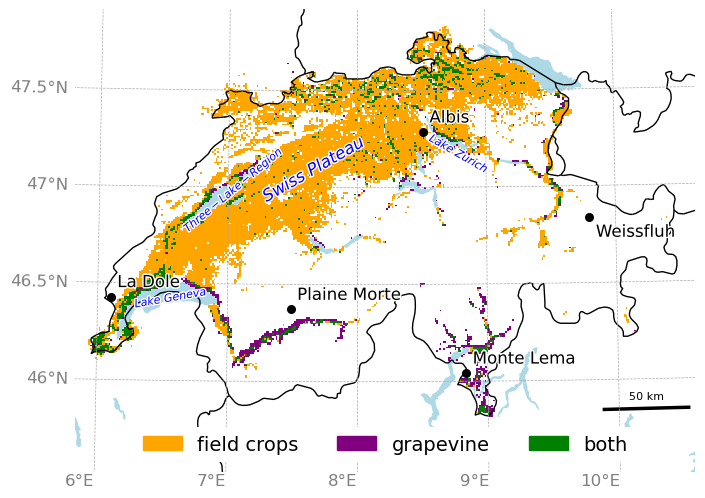

In [5]:
#cmap
colrs=['orange','purple','green']
names=['field crops','grapevine','both']
cMap = matplotlib.colors.ListedColormap(colrs)
# create a patch (proxy artist) for every color to use in legend
import matplotlib.patches as mpatches
patches = [ mpatches.Patch(color=colrs[j], label=names[j]) for j in range(len(names))]

fontsize=12
#matplotlib.rcParams.update({'font.size': fontsize,'axes.labelsize': fontsize,'axes.edgecolor': 'none'})

lon=damages_exposure_data['Reben'].lon.values[0,:,:]
lat=damages_exposure_data['Reben'].lat.values[0,:,:]

fig, axes,exts=plot_CH_map(nrows=1,ncols=1,figsize=(8,10),stamen_map=False, proj=ccrs.PlateCarree(), pads=[0.1,0.1,0.3,0.1], edgecolor=None)

ax=axes[0]
gl=ax.gridlines(draw_labels=["bottom","left"], x_inline=False, y_inline=False,linestyle='--',
                linewidth=0.5,color='darkgrey',xlabel_style={'color':'grey','size':fontsize,'rotation':'horizontal'},
                ylabel_style={'color':'grey','size':fontsize})


#prepare binary data
field_crops=np.where(damages_exposure_data['Weizen_Mais_Raps_Gerste']['n_fields_exp'].values>0,1,0)
grapevine=np.where(damages_exposure_data['Reben']['n_fields_exp'].values>0,2,0)
data=field_crops+grapevine
    
#prepare data for plotting
data = np.ma.masked_where(data == 0, data)

hs=ax.pcolormesh(lon,lat,data,
                         transform=ccrs.PlateCarree(),
                         cmap=cMap) #label='false alarms')

ax.legend(handles=patches,ncol=4,loc='center',bbox_to_anchor=(0.5, 0.06),edgecolor='none',facecolor='w',framealpha=1,fontsize=14)    
            #l=ax.get_legend()
            #l.set_zorder(10)

#name locations

#Define location of Swiss radars and save to pd.Dataframe
albis =         (47.284380558879924,    8.512012256288788)
monte_lema =    (46.0407749638419,      8.833287438635887)
plaine_morte =  (46.37066695182743,     7.48649280864315)
la_dole =       (46.425685686212404,    6.100087861038654)
weissfluh =     (46.83497304383815,     9.79458732101177)


radar_df = pd.DataFrame(index=['Albis','Monte Lema','Plaine Morte','La Dole','Weissfluh'],
                        columns=['lat','lon'],data=[albis,monte_lema,plaine_morte,la_dole,weissfluh])
transform = ccrs.PlateCarree()._as_mpl_transform(ax)
for i, label in enumerate(radar_df.index):
    y_shift = -0.15 if label=='Weissfluh' else 0
    ax.annotate(label, xy=(radar_df.lon[i], radar_df.lat[i]),
                xytext=(radar_df.lon[i]+0.05, radar_df.lat[i]+0.05+y_shift),
                xycoords=transform,fontsize=fontsize,zorder=4,
                path_effects=[matplotlib.patheffects.withStroke(linewidth=2, foreground='white')])

ax.scatter(radar_df.lon,radar_df.lat,marker='o',color='black',s=30,transform=ccrs.PlateCarree(),zorder=4)

#Define location of Swiss lakes and regions and save to pd.Dataframe
lake_zurich =         (47.271108,    8.611633)
lake_geneva =    (46.445164,      6.484824)
three_lakes =  (46.959397,   7.052996)
swiss_plateau = (47.125768, 7.3626658)

rotations=[-30,10,40,30]
yshifts=[-0.2,-0.07,-0.19,-0.2]
xshifts=[0.18,0.08,-0.01,0.3]
fontsizes=[8,8,8,12]
lakes_df = pd.DataFrame(index=['$\it{Lake~Zurich}$','$\it{Lake~Geneva}$','$\it{Three-Lake-Region}$','$\it{Swiss~Plateau}$'],
                        columns=['lat','lon'],data=[lake_zurich,lake_geneva,three_lakes,swiss_plateau])

for i, label in enumerate(lakes_df.index):
    
    ax.annotate(label, xy=(lakes_df.lon[i], lakes_df.lat[i]),
                xytext=(lakes_df.lon[i]+xshifts[i], lakes_df.lat[i]+yshifts[i]), color='blue', rotation=rotations[i],
                xycoords=transform,fontsize=fontsizes[i],zorder=4,ha='center', 
                path_effects=[matplotlib.patheffects.withStroke(linewidth=2, foreground='w')])


scaleBar = Line2D((2790e3,2840e3),(1080e3,1082e3),transform = ccrs.epsg(2056),color='black',linewidth=2.5) #+2km for p2, to receive horizontal line
ax.add_line(scaleBar)
ax.text(2815e3, 1085e3, '50 km', transform=ccrs.epsg(2056),fontsize=8,horizontalalignment='center',verticalalignment='bottom')


#add relief iif available
#da_relief.plot(ax=ax, x='lon', y='lat', cmap="Greys_r",norm=colors.Normalize(vmin=110, vmax=255), 
#               add_colorbar=False, transform=ccrs.PlateCarree(),zorder=0.5)


In [ ]:
fig.savefig(f'{figdir}/Figure_1.png',dpi=100,bbox_inches='tight')
fig.savefig(f'{figdir}/Figure_1.pdf',dpi=100,bbox_inches='tight')